<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/master/Architectural%20Basics/DNN_iteration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


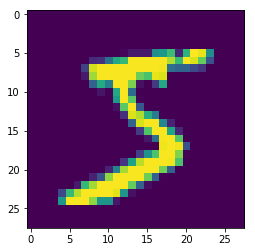

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Iteration 1**

In [46]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(Convolution2D(16, (3, 3), activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(Convolution2D(16, (3, 3), activation='relu'))#5

model.add(Convolution2D(16, 1, activation='relu')) #7
model.add(Flatten())
model.add(Convolution2D(10, 5, activation='softmax'))


ValueError: ignored

In [45]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 11, 11, 16)        272       
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 7, 7, 16)          2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 24s 402us/step - loss: 1.3318 - acc: 0.5512
Epoch 2/10
60000/60000 [==============================] - 23s 386us/step - loss: 1.0330 - acc: 0.6630
Epoch 3/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.9472 - acc: 0.6970
Epoch 4/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.9383 - acc: 0.6985
Epoch 5/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.9334 - acc: 0.6999
Epoch 6/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.9298 - acc: 0.7005
Epoch 7/10
60000/60000 [==============================] - 23s 389us/step - loss: 0.9267 - acc: 0.7013
Epoch 8/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.9233 - acc: 0.7022
Epoch 9/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.9223 - acc: 0.7026
Epoch 10/10
60000/60000 [==============================] - 23s 386us/step - loss: 

**Iteration 2**

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, (3, 3), activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, (3, 3), activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(16, (1, 1), activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(16, (3, 3), activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(16, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

In [42]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 11, 11, 16)        272       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 7, 7, 16)          2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 25s 412us/step - loss: 1.6843 - acc: 0.3851
Epoch 2/10
60000/60000 [==============================] - 23s 386us/step - loss: 1.6307 - acc: 0.3983
Epoch 3/10
60000/60000 [==============================] - 23s 384us/step - loss: 1.6237 - acc: 0.3995
Epoch 4/10
60000/60000 [==============================] - 23s 386us/step - loss: 1.6196 - acc: 0.4001
Epoch 5/10
60000/60000 [==============================] - 23s 386us/step - loss: 1.6165 - acc: 0.4008
Epoch 6/10
60000/60000 [==============================] - 23s 380us/step - loss: 1.6155 - acc: 0.4009
Epoch 7/10
60000/60000 [==============================] - 24s 394us/step - loss: 1.6131 - acc: 0.4014
Epoch 8/10
60000/60000 [==============================] - 25s 410us/step - loss: 1.6114 - acc: 0.4020
Epoch 9/10
60000/60000 [==============================] - 25s 409us/step - loss: 1.6111 - acc: 0.4017
Epoch 10/10
60000/60000 [==============================] - 23s 391us/step - loss: 

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0808 12:07:35.657256 140194990290816 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0808 12:07:35.816193 140194990290816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 39s 644us/step - loss: 0.1595 - acc: 0.9496
Epoch 2/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.0497 - acc: 0.9843
Epoch 3/10
60000/60000 [==============================] - 35s 588us/step - loss: 0.0390 - acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.0337 - acc: 0.9892
Epoch 5/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0284 - acc: 0.9906
Epoch 6/10
60000/60000 [==============================] - 35s 581us/step - loss: 0.0241 - acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 35s 584us/step - loss: 0.0226 - acc: 0.9923
Epoch 8/10
60000/60000 [==============================] - 35s 588us/step - loss: 0.0201 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0173 - acc: 0.9943
Epoch 10/10
60000/60000 [==============================] - 35s 588us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.03348355349614721, 0.9893]


**Iteration 3**

In [51]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10, 1, activation='relu')) #7

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-pac

In [0]:
model.summary()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_21 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_23 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.1808 - acc: 0.9423
Epoch 2/10
60000/60000 [==============================] - 36s 602us/step - loss: 0.0565 - acc: 0.9821
Epoch 3/10
 3968/60000 [>.............................] - ETA: 33s - loss: 0.0340 - acc: 0.9871

In [0]:
y_pred = model.predict(X_test)

In [22]:
print(y_pred[:9])
print(y_test[:9])

[[1.24304997e-15 6.05337985e-17 1.06946841e-12 3.20086497e-06
  1.86959305e-24 8.98722058e-18 1.01799013e-23 9.99996781e-01
  4.71291324e-20 4.52291806e-12]
 [1.27359993e-16 1.30518610e-12 1.00000000e+00 3.72073913e-16
  5.87830479e-12 1.77369404e-27 4.77205324e-11 6.08464163e-21
  1.90098182e-18 2.70542667e-20]
 [1.98312097e-14 1.00000000e+00 2.06220234e-14 1.95687176e-14
  5.53718127e-10 1.15723037e-13 7.66895987e-13 4.69662531e-08
  2.74340994e-10 2.31064828e-15]
 [9.99999881e-01 5.34052080e-23 2.01709268e-13 1.29768201e-12
  4.56468088e-15 6.20405047e-16 8.00612980e-08 3.03846865e-17
  2.43790266e-11 6.11749583e-12]
 [1.36117202e-17 6.64028896e-15 1.27816648e-13 8.62550390e-19
  9.99997497e-01 5.05455165e-17 4.19249678e-17 9.73979968e-21
  1.18653985e-14 2.45091542e-06]
 [8.65765081e-15 1.00000000e+00 1.34074045e-12 1.38822943e-16
  1.00925424e-09 3.35571928e-16 2.71232723e-14 1.25752653e-08
  4.65891128e-12 1.07905338e-15]
 [5.12940593e-24 9.91075453e-16 3.62543680e-16 1.43223971e

**Iteration 4**

In [47]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, 3, 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0808 13:04:57.144613 140194990290816 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packa

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 24, 24, 10)        170       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [48]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 239us/step - loss: 0.2141 - acc: 0.9326 - val_loss: 0.0705 - val_acc: 0.9774
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 176us/step - loss: 0.0660 - acc: 0.9797 - val_loss: 0.0548 - val_acc: 0.9833
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 175us/step - loss: 0.0514 - acc: 0.9838 - val_loss: 0.0366 - val_acc: 0.9881
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0437 - acc: 0.9865 - val_loss: 0.0288 - val_acc: 0.9908
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [50]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019133553126420885, 0.9945]


In [0]:
y_pred = model.predict(X_test)

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored